In [9]:
import sys
import seaborn as sns
import matplotlib
matplotlib.use('Agg')
import matplotlib.pyplot as plt
from matplotlib import rcParams
from collections import OrderedDict
import math
from matplotlib.lines import Line2D
from pylab import rcParams
from collections import Counter
from itertools import combinations
from shutil import copyfile
rcParams['figure.figsize'] = 25, 10
import numpy as np 
import random 
import datetime
import os 
import dill as pickle
import pandas as pd
import matplotlib as mpl
mpl.rcParams['text.usetex'] = True
mpl.rcParams['text.latex.preamble'] = [r'\usepackage{amsmath}'] #for \text command

np.random.seed(0)
random.seed(0)
now = datetime.datetime.now().strftime("%B_%d_%Y_%H_%M_%S")
workingdirectory = os.popen('git rev-parse --show-toplevel').read()[:-1]
sys.path.append(workingdirectory)
os.chdir(workingdirectory)
from codes.otherfunctions.multiplot import highlight_cell
from codes.experimentclasses.EthanolAngles import EthanolAngles
from codes.otherfunctions.multirun import get_coeffs_reps
#from codes.otherfunctions.multirun import get_grads_reps_pca2
from codes.otherfunctions.multiplot import plot_betas, plot_betas2reorder
from codes.geometer.RiemannianManifold import RiemannianManifold
from codes.otherfunctions.get_dictionaries import get_atoms_4
from codes.otherfunctions.get_grads import get_grads
from codes.otherfunctions.multirun import get_support_recovery_lambda
from codes.otherfunctions.multirun import get_lower_interesting_lambda
from codes.otherfunctions.multirun import get_coeffs_and_lambdas
from codes.otherfunctions.multirun import get_support
from codes.otherfunctions.multiplot import plot_support_2d
from codes.otherfunctions.multiplot import plot_reg_path_ax_lambdasearch
from codes.otherfunctions.multiplot import plot_gs_v_dgnorm
from codes.otherfunctions.multirun import get_cosines
from codes.otherfunctions.multiplot import plot_dot_distributions
from codes.geometer.ShapeSpace import ShapeSpace
from codes.geometer.TangentBundle import TangentBundle
from codes.flasso.Replicate import Replicate
from codes.otherfunctions.multirun import get_olsnorm_and_supportsbrute
from codes.otherfunctions.multiplot import highlight_cell
from codes.otherfunctions.get_dictionaries import get_all_atoms_4

from einops import rearrange

In [23]:

def plot_reg_path_ax_lambdasearch_customcolors_norm(ax, coeffs, xaxis,fig, colors):
    p = coeffs.shape[3]
    q = coeffs.shape[1]
    gnames = np.asarray(list(range(p)), dtype=str)

    rcParams['axes.titlesize'] = 30
    plt.rc('text', usetex=True)

    normax = np.sqrt(np.sum(np.sum(np.sum(coeffs ** 2, axis=1), axis=1), axis=1).max())

    for j in range(p):
        toplot = np.linalg.norm(np.linalg.norm(coeffs[:, :, :, j], axis=2), axis=1)
        # axes[0].boxplot(toplot, positions=xaxis, showfliers=False, vert=True, widths=widths,medianprops=dict(linestyle=''))
        ax.plot(xaxis, toplot, 'go--', linewidth=5, markersize=0, alpha=1.,
                     color=colors[j], label=gnames[j])

    kkk = xaxis.copy()
    kkk.sort()

    # xupperindex = np.min(np.where(np.sum(np.sum(np.sum(coeffs**2, axis = 1), axis = 1), axis = 1) ==0)[0])

    #for k in range(1 + q):
    ax.tick_params(labelsize=50)
    #ax.set_xscale('symlog')
    ax.set_yscale('symlog')
    ax.set_ylim(bottom=0, top=normax)
    # axes[k].set_xlim(left = 0, right = xaxis[xupperindex])
    #if (k == 0):
    tixx = np.hstack(
        [np.asarray([0]), 10 ** np.linspace(math.floor(np.log10(normax)), math.floor(np.log10(normax)) + 1, 2)])
#    if k != 0:
        # axes[k].set_yticks(tixx)
    #ax.set_ylabel(r"$\displaystyle \|\hat \beta_{j}\|_2$", fontsize = 70)
    #ax.set_xlabel(r"$\lambda  \sqrt{nm}$", fontsize = 70)
    #ylabel = r"$\displaystyle \|\hat \beta_{j}\|_2$"
    #ax.l
    #if k == 0:
    #ax.set_title("Combined", fontdict={'fontsize': 50})
    ax.grid(True, which="both", alpha=True)

    
def plot_watch3(to_plot, names, colors,ax):
    
    p = to_plot.shape[0]
    #fig, ax = plt.subplots(figsize = (15,15))
    #%matplotlib inline
    
    #fig, ax = plt.subplots(figsize = (15,15))
    theta = np.linspace(0, 2*np.pi, 10000)
    #cmap = plt.get_cmap('twilight_shifted',p)
    
    angles = np.linspace(0, 2*np.pi, p+1)
    
    radius = 1.

    a = radius*np.cos(theta)
    b = radius*np.sin(theta)

    #figure, axes = plt.subplots(figsize = (15,15))

    #axes.plot(a, b, color= 'gray')
    ax.scatter(a, b, color = 'gray', s= .2, alpha = .1)#, '-', color = 'gray')#, s= .1, alpha = .1)#, type = 'line')#,cmap=plt.get_cmap('twilight')) #'hsv','twilight_shifted

    #for i in range(to_plot.shape)
    if len(to_plot.shape) > 1:
        totes = np.sum(to_plot, axis = 0)
    else:
        totes = to_plot
        
    for j in range(p):
        print(np.cos(angles[j]), np.sin(angles[j]))#r'$test \frac{1}{}$'.format(g)
        ax.scatter(np.cos(angles[j]),np.sin(angles[j]),color=colors[j], marker  = 'x')
        ax.text( x = 1.1*np.cos(angles[j]),
                  y = 1.1*np.sin(angles[j]),
                  s = names[j],color=colors[j],
                  fontdict = {'fontsize' : 40},
                  horizontalalignment='center',
         verticalalignment='center')

        ax.text( x = .9*np.cos(angles[j]),y = .9*np.sin(angles[j]),s = str(totes[j] / nreps), fontdict = {'fontsize' : 30},
                  horizontalalignment='center',
         verticalalignment='center')



    for j in range(p):
        ax.scatter(np.cos(angles[j]),np.sin(angles[j]),color=colors[j], marker  = 'o', s = 100*totes[j] )

    if len(to_plot.shape) > 1:
        for i in range(p):
            for j in range(p):

                #point1 = [1, 2]
                #point2 = [3, 4]

                x_values = [np.cos(angles[j]), np.cos(angles[i])]
                #gather x-values

                y_values = [np.sin(angles[j]), np.sin(angles[i])]
                #gather y-values

                ax.plot(x_values, y_values,linewidth = to_plot[i,j], color = 'black')

                if to_plot[i,j] > 0 :
                    ax.text(x = np.mean(x_values),
                      y = np.mean(y_values),
                      s = str(to_plot[i,j] / nreps),
                      fontdict = {'fontsize' : 20})#,
                  #horizontalalignment='left',
                # verticalalignment='bottom')
                #axes.axline((x1, y1), (x2, y2))
    ax.set_aspect(1)
    ax.set_axis_off()

def cosine_similarity(a, b):
    output = np.dot(a, b) / (np.linalg.norm(a) * np.linalg.norm(b))
    return (output)

def get_kappa_s(dg_M):
    n = dg_M.shape[0]
    d= dg_M.shape[1]
    p = dg_M.shape[2]
    maxes = np.zeros(n)
    #coses_zerodiag = coses.copy()
    kappa_ij= np.zeros((n,p))
    for i in range(n):
        kappa_ij[i] = np.linalg.norm(dg_M[i], axis = 0)
    kappa_i = np.max(kappa_ij, axis = 1) / np.min(kappa_ij, axis = 1)
    kappa = np.max(kappa_i)    
    return(kappa)

def get_coses_full_ind(dg, ind):
    n = dg.shape[0]
    p = dg.shape[1]
    d = dg.shape[2]
    l = len(ind)
    coses = np.zeros((n, l, p))
    
    for i in range(n):
        #print(i)
        for j in range(l):
            for k in range(p):
                if ind[j] != k:
                    coses[i, j, k] = cosine_similarity(dg[i, ind[j], :], dg[i, k,:])  # sklearn.metrics.pairwise.cosine_similarity(X = np.reshape(dg[:,i,:], (1,d*n)),Y = np.reshape(dg[:,j,:], (1,d*n)))[0][0]
    # cos_summary = np.abs(coses).sum(axis = 0) / n
    #cos_summary = np.sum(coses ** 2, axis=0) / n
    return (coses)

def get_mu_full_ind(dg, ind):
    n = dg.shape[0]
    p = dg.shape[1]
    d = dg.shape[2]
    l = len(ind)
    coses = np.zeros((n, l, p))
    for i in range(n):
        #print(i)
        for j in range(l):
            for k in range(p):
                if ind[j] != k:
                    coses[i, j, k] = cosine_similarity(dg[i, ind[j], :], dg[i, k,:])  # sklearn.metrics.pairwise.cosine_similarity(X = np.reshape(dg[:,i,:], (1,d*n)),Y = np.reshape(dg[:,j,:], (1,d*n)))[0][0]
    # cos_summary = np.abs(coses).sum(axis = 0) / n
    #cos_summary = np.sum(coses ** 2, axis=0) / n
    return (coses.max())

def get_min_min(dg_M):
    n = dg_M.shape[0]
    d= dg_M.shape[1]
    p = dg_M.shape[2]
    maxes = np.zeros(n)
    #coses_zerodiag = coses.copy()
    kappa_ij= np.zeros((n,p))
    for i in range(n):
        kappa_ij[i] = np.linalg.norm(dg_M[i], axis = 0)
    min_min = np.min(kappa_ij)
    return(min_min)

def get_gamma_max(dg_M):
    output = np.sum(np.sum(dg_M**2, axis = 1), axis = 0).max()
    return(output)

# def get_cosines(self, dg):
def get_cosines_full(dg):
    n = dg.shape[0]
    p = dg.shape[1]
    d = dg.shape[2]
    coses = np.zeros((n, p, p))
    for i in range(n):
        #print(i)
        for j in range(p):
            for k in range(p):
                coses[i, j, k] = cosine_similarity(dg[i, j, :], dg[i, k,:])  # sklearn.metrics.pairwise.cosine_similarity(X = np.reshape(dg[:,i,:], (1,d*n)),Y = np.reshape(dg[:,j,:], (1,d*n)))[0][0]
    # cos_summary = np.abs(coses).sum(axis = 0) / n
    #cos_summary = np.sum(coses ** 2, axis=0) / n
    return (coses)

def cosine_similarity(a, b):
    output = np.dot(a, b) / (np.linalg.norm(a) * np.linalg.norm(b))
    return (output)

# def get_cosines(self, dg):
def get_cosines2(dg):
    n = dg.shape[0]
    p = dg.shape[1]
    d = dg.shape[2]

    coses = np.zeros((n, p, p))
    for i in range(n):
        print(i)
        for j in range(p):
            for k in range(p):
                coses[i, j, k] = cosine_similarity(dg[i, j, :], dg[i, k,:])  # sklearn.metrics.pairwise.cosine_similarity(X = np.reshape(dg[:,i,:], (1,d*n)),Y = np.reshape(dg[:,j,:], (1,d*n)))[0][0]
    # cos_summary = np.abs(coses).sum(axis = 0) / n
    #cos_summary = np.sum(coses ** 2, axis=0) / n
    return (coses)
#coses = get_cosines2(np.swapaxes(replicates[0].dg_M,1,2))

def get_cosines(dg):
    n = dg.shape[0]
    p = dg.shape[1]
    d = dg.shape[2]

    coses = np.zeros((n, p, p))
    for i in range(n):
        print(i)
        for j in range(p):
            for k in range(p):
                coses[i, j, k] = cosine_similarity(dg[i, j, :], dg[i, k,:])  # sklearn.metrics.pairwise.cosine_similarity(X = np.reshape(dg[:,i,:], (1,d*n)),Y = np.reshape(dg[:,j,:], (1,d*n)))[0][0]
    # cos_summary = np.abs(coses).sum(axis = 0) / n
    cos_summary = np.mean(coses, axis = 0)#np.sum(coses ** 2, axis=0) / n
    return (cos_summary)

In [4]:
#let us gaze into the malonaldehyde:
with open('/Users/samsonkoelle/Downloads/ethanol_010721_pallrep5n100results.pkl' ,
         'rb') as loader:
     results = pickle.load(loader)
        
#let us gaze into the malonaldehyde:
with open('/Users/samsonkoelle/Downloads/ethanol_010721_pallrep5n100replicates_small.pkl' ,
         'rb') as loader:
     replicates = pickle.load(loader)


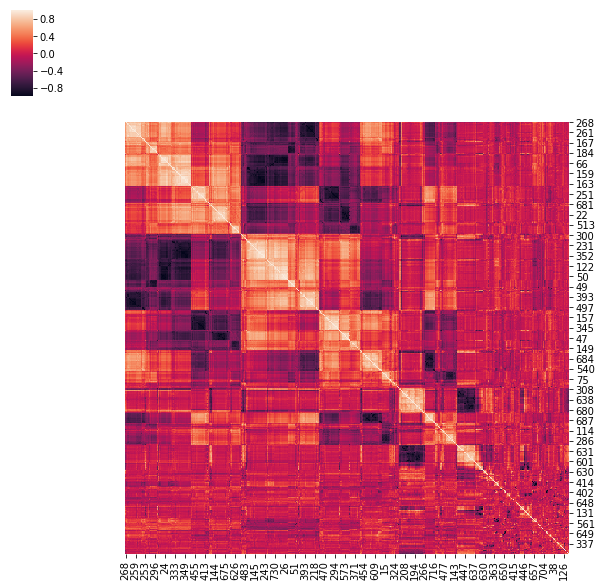

In [5]:
%matplotlib inline
r = 0
rep = replicates[r]
clustermap = sns.clustermap(rep.cos)
clustermap.ax_row_dendrogram.set_visible(False)
clustermap.ax_col_dendrogram.set_visible(False)

In [40]:
results= results2

In [41]:
#reorder lambdas and coefficients
for r in range(5):
    cs = rearrange(np.asarray(list(results[r][1].values())), 'l n p m -> l m n p')
    xaxis = np.asarray(np.asarray(list(results[r][1].keys())))
    xaxis_reorder = xaxis[xaxis.argsort()]
    cs_reorder = cs[xaxis.argsort()]
    xaxis_reorder = xaxis[xaxis.argsort()]
    replicates[r].cs = cs
    replicates[r].cs_reorder = cs_reorder
    replicates[r].xaxis_reorder = xaxis_reorder
    replicates[r].xaxis = xaxis


#get selection lambda
nreps = 5
sel_l = np.zeros(nreps, dtype = int)
for r in range(5):
    for l in range(replicates[r].cs_reorder.shape[0]):
        zeros = np.where((replicates[r].cs_reorder**2).sum(axis = 1).sum(axis = 1)[l] !=0.)[0]
        if len(zeros) == 2:
            sel_l[r] = l
            #print(np.where((replicates[r].cs_reorder**2).sum(axis = 1).sum(axis = 1)[2] !=0.))


#get almost selection lambda
almost_sel = {}
sel = {}
min_sel = {}
for r in range(5):
    print('s')
    almost_sel[r] = np.where((replicates[r].cs_reorder**2).sum(axis = 1).sum(axis = 1)[sel_l[r]-1] !=0.)[0]
    sel[r] = np.where((replicates[r].cs_reorder**2).sum(axis = 1).sum(axis = 1)[sel_l[r]] !=0.)[0]
    print('a')
    min_sel[r] =  np.where((replicates[r].cs_reorder**2).sum(axis = 1).sum(axis = 1)[1] !=0.)[0]
#sel_total = almost_sel

#subset

subset = np.unique(np.hstack([np.concatenate(list(almost_sel.values())),np.concatenate(list(sel.values())) ]))
psmallest = len(subset)

to_plot = np.zeros((psmallest, psmallest))
nreps = 5
for r in range(nreps):
    i_smallest = np.where(subset == sel[r][0])[0]
    j_smallest = np.where(subset == sel[r][1])[0]
    to_plot[i_smallest,j_smallest] +=1
    to_plot[j_smallest,i_smallest] +=1
    
names = np.zeros(len(subset), dtype = object)
for s in range(len(subset)):
    names[s] = r"$g_{{{}}}$".format(subset[s])

cmap = plt.get_cmap('brg',len(subset))

colors_subset = np.zeros((len(subset),4))
for s in range(len(subset)):
    colors_subset[s] = cmap(s)

subset_l0 = np.unique(np.asarray(list(sel.values())))
psmallest = len(subset_l0)
to_plot_l0 = np.zeros((psmallest, psmallest))

nreps = 5
for r in range(nreps):
    #to_plot[sel]
    
    i_smallest = np.where(subset_l0 == sel[r][0])[0]
    print(sel[r][0], i_smallest)
    
    j_smallest = np.where(subset_l0 == sel[r][1])[0]
    print(sel[r][0], j_smallest)
    
    to_plot_l0[i_smallest,j_smallest] +=1
    to_plot_l0[j_smallest,i_smallest] +=1
    
names_l0 = np.zeros(len(subset_l0), dtype = object)
for s in range(len(subset_l0)):
    names_l0[s] = r"$g_{{{}}}$".format(subset_l0[s])

names = np.zeros(len(subset), dtype = object)
for s in range(len(subset)):
    names[s] = r"$g_{{{}}}$".format(subset[s])



s
a
s
a
s
a
s
a
s
a
721 [2]
721 [3]
196 [0]
196 [2]
721 [2]
721 [4]
721 [2]
721 [3]
197 [1]
197 [2]


In [33]:
nreps = 5
min_mins = np.zeros(nreps, dtype = np.float64)
mus = np.zeros(nreps, dtype = np.float64)
kappas = np.zeros(nreps, dtype = np.float64)
gamma_maxs = np.zeros(nreps, dtype = np.float64)
n = nsel
for r in range(nreps):
    print(r)
    inds = sel[r]
    dg_M = replicates[r].dg_M
    min_mins[r]  = get_min_min(dg_M[:,:,inds]*n)
    mus[r] = get_mu_full_ind(np.swapaxes(dg_M,1,2)*n, inds)
    kappas[r] = get_kappa_s(replicates[r].dg_M[:,:,inds]*n)
    gamma_maxs[r] = get_gamma_max(dg_M[:,:,inds]*np.sqrt(n ))
    
df_eth = pd.DataFrame(np.asarray([np.mean(mus), np.sqrt(np.var(mus)), 
                    np.mean(kappas), np.sqrt(np.var(kappas)),
                    np.mean(gamma_maxs),np.sqrt(np.var(gamma_maxs)),
                    np.mean(min_mins),np.sqrt(np.var(min_mins))]).transpose()).transpose()

0
1
2
3
4


In [42]:
colors_l0 = np.zeros((len(subset_l0),4 ))
for s in range(len(subset_l0)):
    print(subset_l0[s])
    colors_l0[s] = colors_subset[np.where(subset_l0 == subset_l0[s])[0]]



196
197
721
722
740


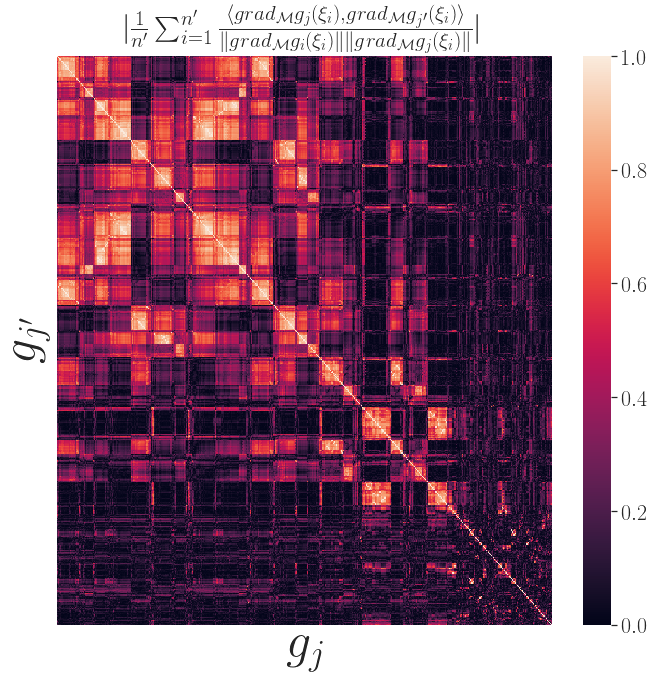

In [10]:
#figure a

sns.set(font_scale=2)
f, axarr = plt.subplots(1,1, figsize=(10, 10))
#[ax.set_axis_off() for ax in axarr.ravel()]

sns.heatmap(np.abs(rep.cos)[clustermap.dendrogram_col.reordered_ind][:,clustermap.dendrogram_col.reordered_ind], ax = axarr)
axarr.set_title(r"$|\frac{1}{n'} \sum_{i = 1}^{n'} \frac{\langle grad_{\mathcal M} g_j (\xi_i) ,grad_{\mathcal M} g_{j'} (\xi_i)\rangle}{\|grad_{\mathcal M} g_i (\xi_i) \| \| grad_{\mathcal M} g_j(\xi_i) \|}| $" ,
                fontsize = 30)
axarr.set_xticklabels([])
axarr.set_yticklabels([])
axarr.set_xticks([])
axarr.set_yticks([])
axarr.set_xlabel(r'$g_j$', fontsize= 50)
axarr.set_ylabel(r"$g_{j'}$", fontsize= 50)
plt.tight_layout()
plt.savefig('/Users/samsonkoelle/Downloads/manigrad-100818/mani-samk-gradients/Figures/figure_for_jmlr/eth_fulldict_cosines')


1.0 0.0
0.30901699437494745 0.9510565162951535
-0.8090169943749473 0.5877852522924732
-0.8090169943749475 -0.587785252292473
0.30901699437494723 -0.9510565162951536


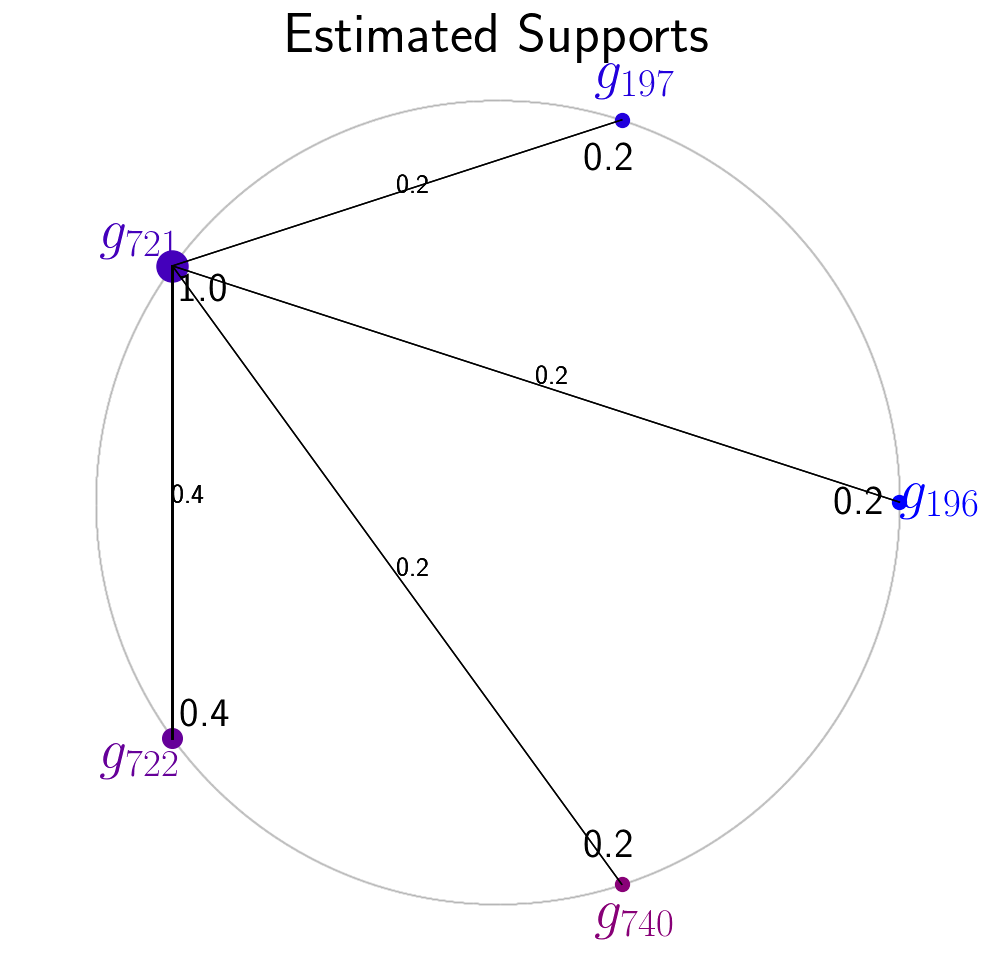

In [43]:
# f, axarr = plt.subplots(figsize=(10, 10))
# plot_watch3(to_plot_l0, names=names_l0, colors=colors_l0, ax = axarr)
# axarr.set_title('Estimated Supports', fontsize=  40)
# plt.tight_layout()
# #plt.savefig('/Users/samsonkoelle/Downloads/manigrad-100818/mani-samk-gradients/Figures/figure_for_jmlr/eth_fulldict_estimatedsupports')


1.0 0.0
0.30901699437494745 0.9510565162951535
-0.8090169943749473 0.5877852522924732
-0.8090169943749475 -0.587785252292473
0.30901699437494723 -0.9510565162951536


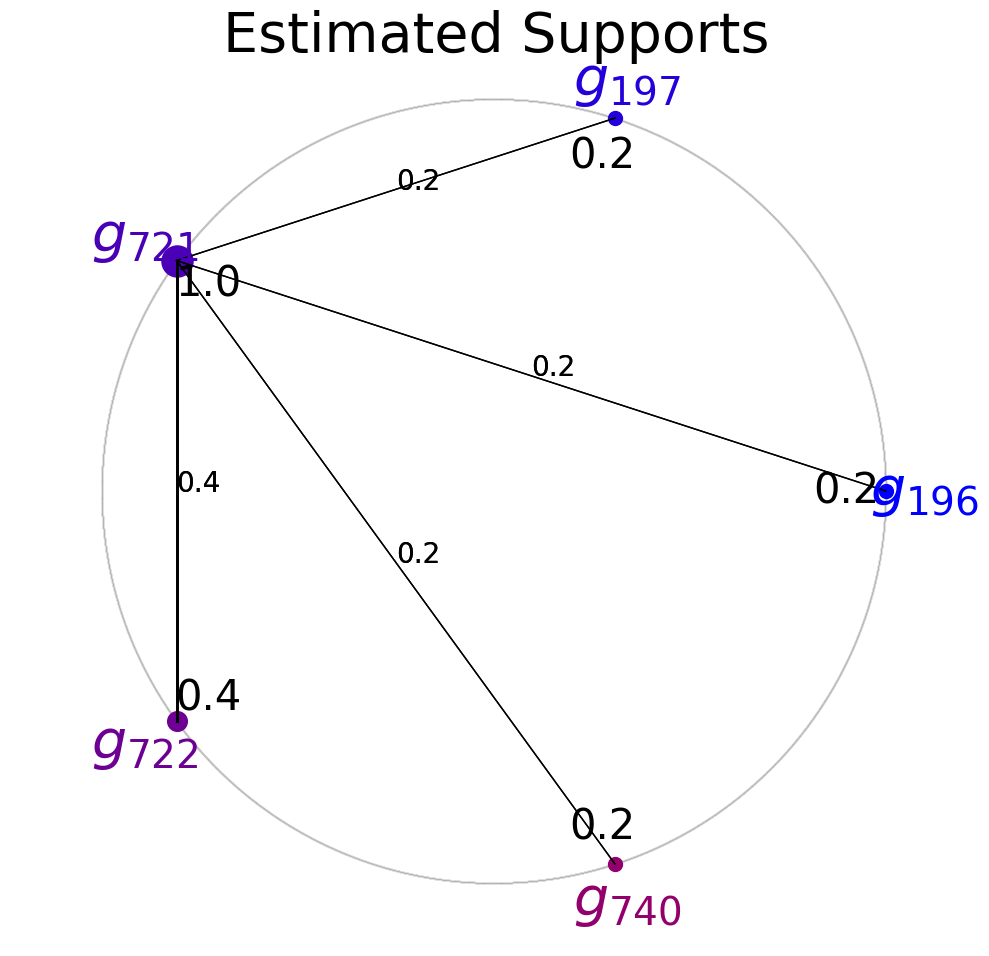

In [35]:
f, axarr = plt.subplots(figsize=(10, 10))
plot_watch3(to_plot_l0, names=names_l0, colors=colors_l0, ax = axarr)
axarr.set_title('Estimated Supports', fontsize=  40)
plt.tight_layout()
#plt.savefig('/Users/samsonkoelle/Downloads/manigrad-100818/mani-samk-gradients/Figures/figure_for_jmlr/eth_fulldict_estimatedsupports')


In [44]:
r= 0
colors = np.zeros((756,4))
colors[:,3] = 1

#colors[r0subset] = colors_r0
colors[subset] = colors_subset

cs = rearrange(np.asarray(list(results[r][1].values())), 'l n p m -> l m n p')
xaxis = np.asarray(np.asarray(list(results[r][1].keys())))
xaxis_reorder = xaxis[xaxis.argsort()]
cs_reorder = cs[xaxis.argsort()]
xaxis_reorder = xaxis[xaxis.argsort()]
replicates[r].cs = cs
replicates[r].cs_reorder = cs_reorder
replicates[r].xaxis_reorder = xaxis_reorder
replicates[r].xaxis = xaxis

mpl.style.use('default')
sell_plot = np.where(xaxis_reorder == results[r][0])[0]

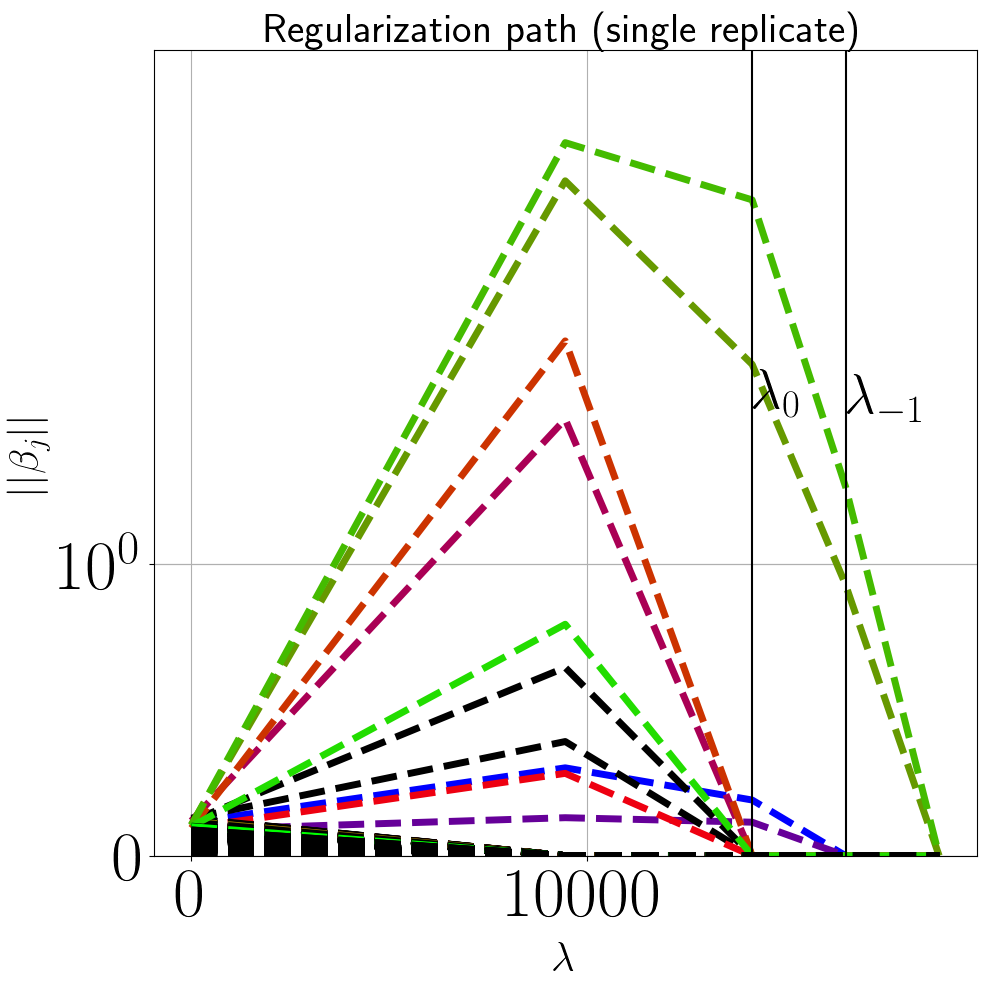

In [46]:
f, axarr = plt.subplots(1,1,figsize=(10, 10))
#axarr.set_axis_off() 
#mpl.style.use('default')
plot_reg_path_ax_lambdasearch_customcolors_norm(axarr, cs_reorder, xaxis_reorder * np.sqrt(nsel * m ) , f,colors)#axes_all[0].imshow(asdf)
axarr.set_xlabel(r'$\lambda$', fontsize = 30)
axarr.set_ylabel(r'$||\beta_j||$', fontsize = 30)

axarr.axvline(xaxis_reorder[sell_plot] * np.sqrt(nsel * m )  , color = 'black')
axarr.text(xaxis_reorder[sell_plot] * np.sqrt(nsel * m ) , 1.5, r'$\lambda_{-1}$', fontsize = 40)
axarr.axvline(xaxis_reorder[sell_plot-1]* np.sqrt(nsel * m )  , color = 'black')
axarr.text(xaxis_reorder[sell_plot-1]* np.sqrt(nsel * m )  , 1.5, r'$\lambda_{0}$', fontsize = 40)
axarr.set_title('Regularization path (single replicate)')
plt.tight_layout()
#plt.savefig('/Users/samsonkoelle/Downloads/manigrad-100818/mani-samk-gradients/Figures/figure_for_jmlr/eth_fulldict_replicate')

#axarr.patch.set_facecolor('None')

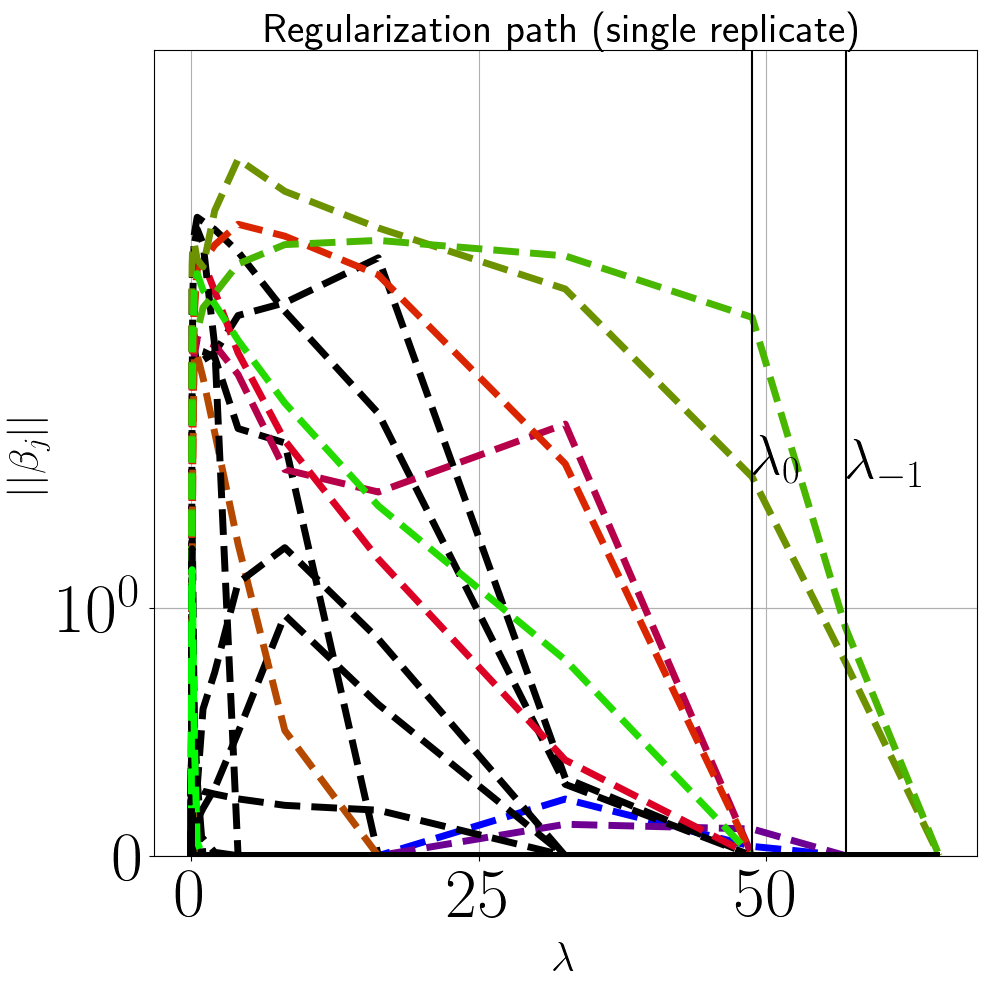

In [24]:
# f, axarr = plt.subplots(1,1,figsize=(10, 10))
# #axarr.set_axis_off() 
# #mpl.style.use('default')
# plot_reg_path_ax_lambdasearch_customcolors_norm(axarr, cs_reorder, xaxis_reorder / np.sqrt(nsel * m ) , f,colors)#axes_all[0].imshow(asdf)
# axarr.set_xlabel(r'$\lambda$', fontsize = 30)
# axarr.set_ylabel(r'$||\beta_j||$', fontsize = 30)

# axarr.axvline(xaxis_reorder[sell_plot] / np.sqrt(nsel * m )  , color = 'black')
# axarr.text(xaxis_reorder[sell_plot] / np.sqrt(nsel * m ) , 1.5, r'$\lambda_{-1}$', fontsize = 40)
# axarr.axvline(xaxis_reorder[sell_plot-1]/ np.sqrt(nsel * m )  , color = 'black')
# axarr.text(xaxis_reorder[sell_plot-1]/ np.sqrt(nsel * m )  , 1.5, r'$\lambda_{0}$', fontsize = 40)
# axarr.set_title('Regularization path (single replicate)')
# plt.tight_layout()
# #plt.savefig('/Users/samsonkoelle/Downloads/manigrad-100818/mani-samk-gradients/Figures/figure_for_jmlr/eth_fulldict_replicate')

# #axarr.patch.set_facecolor('None')

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99


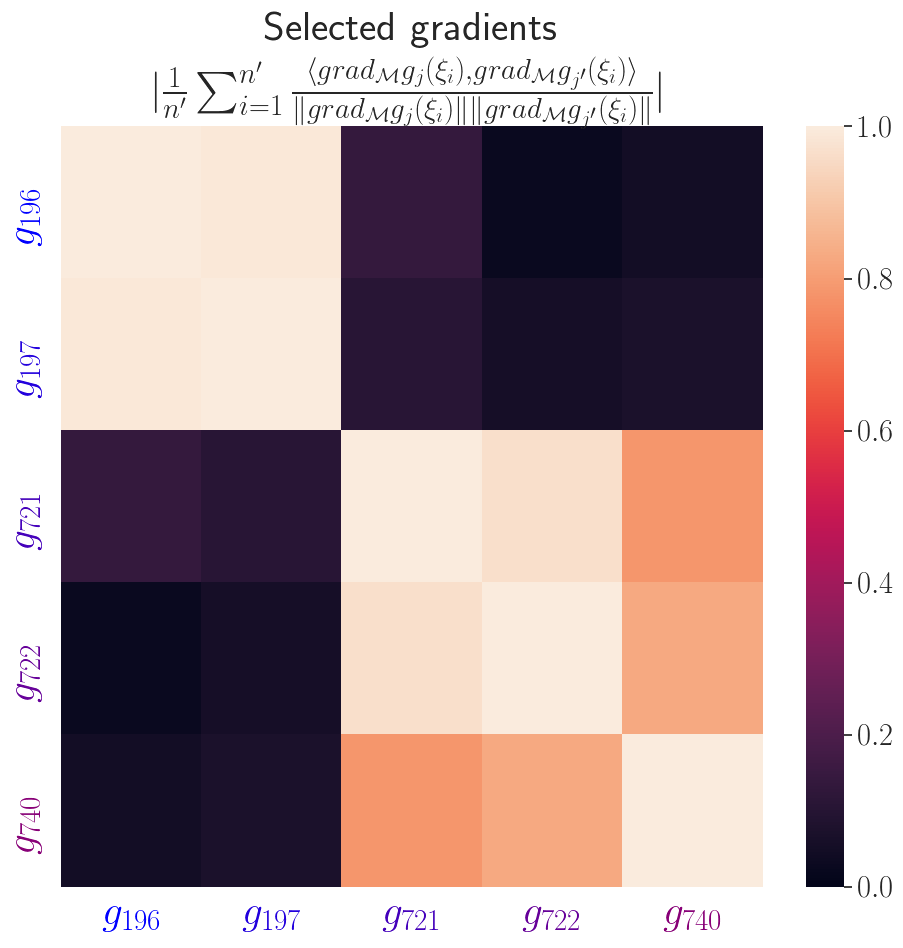

In [47]:
sns.set(font_scale=2)
f, axarr = plt.subplots(figsize=(10, 10))
cuz_l0 = np.abs(get_cosines(np.swapaxes(replicates[0].dg_M[:,:,subset_l0], 1,2)))
sns.heatmap(cuz_l0, yticklabels = names_l0, xticklabels = names_l0, ax = axarr, vmin = 0., vmax = 1.)
axarr.set_xticklabels(axarr.get_xmajorticklabels(), fontsize = 30)
axarr.set_yticklabels(axarr.get_ymajorticklabels(), fontsize = 30)
for xtick, color in zip(axarr.get_xticklabels(), colors_l0):
    xtick.set_color(color)
for ytick, color in zip(axarr.get_yticklabels(), colors_l0):
    ytick.set_color(color)
axarr.set_title('Selected gradients \n' + r"$|\frac{1}{n'} \sum_{i = 1}^{n'} \frac{\langle grad_{\mathcal M} g_j (\xi_i) ,grad_{\mathcal M} g_{j'} (\xi_i)\rangle}{\|grad_{\mathcal M} g_j (\xi_i) \| \| grad_{\mathcal M} g_{j'}(\xi_i) \|}| $" ,
                fontsize = 30)
plt.tight_layout()
#plt.savefig('/Users/samsonkoelle/Downloads/manigrad-100818/mani-samk-gradients/Figures/figure_for_jmlr/eth_fulldict_estimatedsupport_cosines')


In [29]:
from codes.flasso.GradientGroupLasso import batch_stream, get_sr_lambda_sam_parallel
gl_itermax = 500
max_search = 30
reg_l2 = 0.
card = 2
tol = 1e-14
learning_rate = 100


In [30]:
results2 = {}
for r in range(nreps):
    ul = np.linalg.norm(np.einsum('n d m, n d p -> n p m ' ,replicates[r].df_M , replicates[r].dg_M), axis = tuple([0,2])).max()
    lambdas_start = [0.,ul]
    results2[r] = Replicate()
    results2[r] = get_sr_lambda_sam_parallel(replicates[r], gl_itermax, lambdas_start,reg_l2, max_search, card, tol,learning_rate)
    


initializing lambda search
0
lr 100
lr 50.0
lr 25.0
lr 12.5
lr 6.25
lr 3.125
lr 1.5625
lr 0.78125
lr 0.390625
lr 0.1953125
lr 0.09765625
lr 0.048828125
lr 0.0244140625
lr 0.01220703125
lr 0.006103515625
lr 0.0030517578125
lr 0.00152587890625
lr 0.000762939453125
lr 0.0003814697265625
lr 0.00019073486328125
lr 9.5367431640625e-05
lr 4.76837158203125e-05
1
lr 4.76837158203125e-05
2
lr 4.76837158203125e-05
3
lr 4.76837158203125e-05
4
lr 4.76837158203125e-05
5
lr 4.76837158203125e-05
6
lr 4.76837158203125e-05
7
lr 4.76837158203125e-05
lr 2.384185791015625e-05
8
lr 2.384185791015625e-05
9
lr 2.384185791015625e-05
10
lr 2.384185791015625e-05
11
lr 2.384185791015625e-05
12
lr 2.384185791015625e-05
13
lr 2.384185791015625e-05
14
lr 2.384185791015625e-05
15
lr 2.384185791015625e-05
16
lr 2.384185791015625e-05
17
lr 2.384185791015625e-05
18
lr 2.384185791015625e-05
19
lr 2.384185791015625e-05
20
lr 2.384185791015625e-05
21
lr 2.384185791015625e-05
22
lr 2.384185791015625e-05
23
lr 2.384185791015

lr 2.384185791015625e-05
276
lr 2.384185791015625e-05
277
lr 2.384185791015625e-05
278
lr 2.384185791015625e-05
279
lr 2.384185791015625e-05
280
lr 2.384185791015625e-05
281
lr 2.384185791015625e-05
282
lr 2.384185791015625e-05
283
lr 2.384185791015625e-05
284
lr 2.384185791015625e-05
285
lr 2.384185791015625e-05
286
lr 2.384185791015625e-05
287
lr 2.384185791015625e-05
288
lr 2.384185791015625e-05
289
lr 2.384185791015625e-05
290
lr 2.384185791015625e-05
291
lr 2.384185791015625e-05
292
lr 2.384185791015625e-05
293
lr 2.384185791015625e-05
294
lr 2.384185791015625e-05
295
lr 2.384185791015625e-05
296
lr 2.384185791015625e-05
297
lr 2.384185791015625e-05
298
lr 2.384185791015625e-05
299
lr 2.384185791015625e-05
300
lr 2.384185791015625e-05
301
lr 2.384185791015625e-05
302
lr 2.384185791015625e-05
303
lr 2.384185791015625e-05
304
lr 2.384185791015625e-05
305
lr 2.384185791015625e-05
306
lr 2.384185791015625e-05
307
lr 2.384185791015625e-05
308
lr 2.384185791015625e-05
309
lr 2.384185791

lr 0.09765625
lr 0.048828125
lr 0.0244140625
lr 0.01220703125
lr 0.006103515625
lr 0.0030517578125
lr 0.00152587890625
lr 0.000762939453125
lr 0.0003814697265625
lr 0.00019073486328125
lr 9.5367431640625e-05
1
lr 9.5367431640625e-05
2
lr 9.5367431640625e-05
3
lr 9.5367431640625e-05
lr 4.76837158203125e-05
4
lr 4.76837158203125e-05
5
lr 4.76837158203125e-05
6
lr 4.76837158203125e-05
7
lr 4.76837158203125e-05
8
lr 4.76837158203125e-05
9
lr 4.76837158203125e-05
10
lr 4.76837158203125e-05
11
lr 4.76837158203125e-05
12
lr 4.76837158203125e-05
13
lr 4.76837158203125e-05
14
lr 4.76837158203125e-05
15
lr 4.76837158203125e-05
16
lr 4.76837158203125e-05
17
lr 4.76837158203125e-05
18
lr 4.76837158203125e-05
19
lr 4.76837158203125e-05
20
lr 4.76837158203125e-05
21
lr 4.76837158203125e-05
22
lr 4.76837158203125e-05
23
lr 4.76837158203125e-05
24
lr 4.76837158203125e-05
25
lr 4.76837158203125e-05
26
lr 4.76837158203125e-05
27
lr 4.76837158203125e-05
28
lr 4.76837158203125e-05
29
lr 4.76837158203125e-

lr 4.76837158203125e-05
291
lr 4.76837158203125e-05
292
lr 4.76837158203125e-05
293
lr 4.76837158203125e-05
294
lr 4.76837158203125e-05
295
lr 4.76837158203125e-05
296
lr 4.76837158203125e-05
297
lr 4.76837158203125e-05
298
lr 4.76837158203125e-05
299
lr 4.76837158203125e-05
300
lr 4.76837158203125e-05
301
lr 4.76837158203125e-05
302
lr 4.76837158203125e-05
303
lr 4.76837158203125e-05
304
lr 4.76837158203125e-05
305
lr 4.76837158203125e-05
306
lr 4.76837158203125e-05
307
lr 4.76837158203125e-05
308
lr 4.76837158203125e-05
309
lr 4.76837158203125e-05
310
lr 4.76837158203125e-05
311
lr 4.76837158203125e-05
312
lr 4.76837158203125e-05
313
lr 4.76837158203125e-05
314
lr 4.76837158203125e-05
315
lr 4.76837158203125e-05
316
lr 4.76837158203125e-05
317
lr 4.76837158203125e-05
318
lr 4.76837158203125e-05
319
lr 4.76837158203125e-05
320
lr 4.76837158203125e-05
321
lr 4.76837158203125e-05
322
lr 4.76837158203125e-05
323
lr 4.76837158203125e-05
324
lr 4.76837158203125e-05
325
lr 4.76837158203125e

lr 9.5367431640625e-05
80
lr 9.5367431640625e-05
81
lr 9.5367431640625e-05
82
lr 9.5367431640625e-05
83
lr 9.5367431640625e-05
84
lr 9.5367431640625e-05
85
lr 9.5367431640625e-05
86
lr 9.5367431640625e-05
87
lr 9.5367431640625e-05
88
lr 9.5367431640625e-05
89
lr 9.5367431640625e-05
90
lr 9.5367431640625e-05
91
lr 9.5367431640625e-05
92
lr 9.5367431640625e-05
93
lr 9.5367431640625e-05
94
lr 9.5367431640625e-05
95
lr 9.5367431640625e-05
96
lr 9.5367431640625e-05
97
lr 9.5367431640625e-05
98
lr 9.5367431640625e-05
99
lr 9.5367431640625e-05
100
lr 9.5367431640625e-05
101
lr 9.5367431640625e-05
102
lr 9.5367431640625e-05
103
lr 9.5367431640625e-05
104
lr 9.5367431640625e-05
105
lr 9.5367431640625e-05
106
lr 9.5367431640625e-05
107
lr 9.5367431640625e-05
108
lr 9.5367431640625e-05
109
lr 9.5367431640625e-05
110
lr 9.5367431640625e-05
111
lr 9.5367431640625e-05
112
lr 9.5367431640625e-05
113
lr 9.5367431640625e-05
114
lr 9.5367431640625e-05
115
lr 9.5367431640625e-05
116
lr 9.5367431640625e-0

lr 9.5367431640625e-05
386
lr 9.5367431640625e-05
387
lr 9.5367431640625e-05
388
lr 9.5367431640625e-05
389
lr 9.5367431640625e-05
390
lr 9.5367431640625e-05
391
lr 9.5367431640625e-05
392
lr 9.5367431640625e-05
393
lr 9.5367431640625e-05
394
lr 9.5367431640625e-05
395
lr 9.5367431640625e-05
396
lr 9.5367431640625e-05
397
lr 9.5367431640625e-05
398
lr 9.5367431640625e-05
399
lr 9.5367431640625e-05
400
lr 9.5367431640625e-05
401
lr 9.5367431640625e-05
402
lr 9.5367431640625e-05
403
lr 9.5367431640625e-05
404
lr 9.5367431640625e-05
405
lr 9.5367431640625e-05
406
lr 9.5367431640625e-05
407
lr 9.5367431640625e-05
408
lr 9.5367431640625e-05
409
lr 9.5367431640625e-05
410
lr 9.5367431640625e-05
411
lr 9.5367431640625e-05
412
lr 9.5367431640625e-05
413
lr 9.5367431640625e-05
414
lr 9.5367431640625e-05
415
lr 9.5367431640625e-05
416
lr 9.5367431640625e-05
417
lr 9.5367431640625e-05
418
lr 9.5367431640625e-05
419
lr 9.5367431640625e-05
420
lr 9.5367431640625e-05
421
lr 9.5367431640625e-05
422
l

lr 0.00152587890625
210
lr 0.00152587890625
211
lr 0.00152587890625
212
lr 0.00152587890625
213
lr 0.00152587890625
214
lr 0.00152587890625
215
lr 0.00152587890625
216
lr 0.00152587890625
217
lr 0.00152587890625
218
lr 0.00152587890625
219
lr 0.00152587890625
220
lr 0.00152587890625
221
lr 0.00152587890625
222
lr 0.00152587890625
223
lr 0.00152587890625
224
lr 0.00152587890625
225
lr 0.00152587890625
226
lr 0.00152587890625
227
lr 0.00152587890625
228
lr 0.00152587890625
229
lr 0.00152587890625
230
lr 0.00152587890625
231
lr 0.00152587890625
232
lr 0.00152587890625
233
lr 0.00152587890625
234
lr 0.00152587890625
235
lr 0.00152587890625
236
lr 0.00152587890625
237
lr 0.00152587890625
238
lr 0.00152587890625
239
lr 0.00152587890625
240
lr 0.00152587890625
241
lr 0.00152587890625
242
lr 0.00152587890625
243
lr 0.00152587890625
244
lr 0.00152587890625
245
lr 0.00152587890625
246
lr 0.00152587890625
247
lr 0.00152587890625
248
lr 0.00152587890625
249
lr 0.00152587890625
250
lr 0.00152587890

lr 4.76837158203125e-05
35
lr 4.76837158203125e-05
36
lr 4.76837158203125e-05
37
lr 4.76837158203125e-05
38
lr 4.76837158203125e-05
39
lr 4.76837158203125e-05
40
lr 4.76837158203125e-05
41
lr 4.76837158203125e-05
42
lr 4.76837158203125e-05
43
lr 4.76837158203125e-05
44
lr 4.76837158203125e-05
45
lr 4.76837158203125e-05
46
lr 4.76837158203125e-05
47
lr 4.76837158203125e-05
48
lr 4.76837158203125e-05
49
lr 4.76837158203125e-05
50
lr 4.76837158203125e-05
51
lr 4.76837158203125e-05
52
lr 4.76837158203125e-05
53
lr 4.76837158203125e-05
54
lr 4.76837158203125e-05
55
lr 4.76837158203125e-05
56
lr 4.76837158203125e-05
57
lr 4.76837158203125e-05
58
lr 4.76837158203125e-05
59
lr 4.76837158203125e-05
60
lr 4.76837158203125e-05
61
lr 4.76837158203125e-05
62
lr 4.76837158203125e-05
63
lr 4.76837158203125e-05
64
lr 4.76837158203125e-05
65
lr 4.76837158203125e-05
66
lr 4.76837158203125e-05
67
lr 4.76837158203125e-05
68
lr 4.76837158203125e-05
69
lr 4.76837158203125e-05
70
lr 4.76837158203125e-05
71
l

lr 4.76837158203125e-05
330
lr 4.76837158203125e-05
331
lr 4.76837158203125e-05
332
lr 4.76837158203125e-05
333
lr 4.76837158203125e-05
334
lr 4.76837158203125e-05
335
lr 4.76837158203125e-05
336
lr 4.76837158203125e-05
337
lr 4.76837158203125e-05
338
lr 4.76837158203125e-05
339
lr 4.76837158203125e-05
340
lr 4.76837158203125e-05
341
lr 4.76837158203125e-05
342
lr 4.76837158203125e-05
343
lr 4.76837158203125e-05
344
lr 4.76837158203125e-05
345
lr 4.76837158203125e-05
346
lr 4.76837158203125e-05
347
lr 4.76837158203125e-05
348
lr 4.76837158203125e-05
349
lr 4.76837158203125e-05
350
lr 4.76837158203125e-05
351
lr 4.76837158203125e-05
352
lr 4.76837158203125e-05
353
lr 4.76837158203125e-05
354
lr 4.76837158203125e-05
355
lr 4.76837158203125e-05
356
lr 4.76837158203125e-05
357
lr 4.76837158203125e-05
358
lr 4.76837158203125e-05
359
lr 4.76837158203125e-05
360
lr 4.76837158203125e-05
361
lr 4.76837158203125e-05
362
lr 4.76837158203125e-05
363
lr 4.76837158203125e-05
364
lr 4.76837158203125e

lr 9.5367431640625e-05
60
lr 9.5367431640625e-05
61
lr 9.5367431640625e-05
62
lr 9.5367431640625e-05
63
lr 9.5367431640625e-05
64
lr 9.5367431640625e-05
65
lr 9.5367431640625e-05
66
lr 9.5367431640625e-05
67
lr 9.5367431640625e-05
68
lr 9.5367431640625e-05
69
lr 9.5367431640625e-05
70
lr 9.5367431640625e-05
71
lr 9.5367431640625e-05
72
lr 9.5367431640625e-05
73
lr 9.5367431640625e-05
74
lr 9.5367431640625e-05
75
lr 9.5367431640625e-05
76
lr 9.5367431640625e-05
77
lr 9.5367431640625e-05
78
lr 9.5367431640625e-05
79
lr 9.5367431640625e-05
80
lr 9.5367431640625e-05
81
lr 9.5367431640625e-05
82
lr 9.5367431640625e-05
83
lr 9.5367431640625e-05
84
lr 9.5367431640625e-05
85
lr 9.5367431640625e-05
86
lr 9.5367431640625e-05
87
lr 9.5367431640625e-05
88
lr 9.5367431640625e-05
89
lr 9.5367431640625e-05
90
lr 9.5367431640625e-05
91
lr 9.5367431640625e-05
92
lr 9.5367431640625e-05
93
lr 9.5367431640625e-05
94
lr 9.5367431640625e-05
95
lr 9.5367431640625e-05
96
lr 9.5367431640625e-05
97
lr 9.5367431

lr 9.5367431640625e-05
366
lr 9.5367431640625e-05
367
lr 9.5367431640625e-05
368
lr 9.5367431640625e-05
369
lr 9.5367431640625e-05
370
lr 9.5367431640625e-05
371
lr 9.5367431640625e-05
372
lr 9.5367431640625e-05
373
lr 9.5367431640625e-05
374
lr 9.5367431640625e-05
375
lr 9.5367431640625e-05
376
lr 9.5367431640625e-05
377
lr 9.5367431640625e-05
378
lr 9.5367431640625e-05
379
lr 9.5367431640625e-05
380
lr 9.5367431640625e-05
381
lr 9.5367431640625e-05
382
lr 9.5367431640625e-05
383
lr 9.5367431640625e-05
384
lr 9.5367431640625e-05
385
lr 9.5367431640625e-05
386
lr 9.5367431640625e-05
387
lr 9.5367431640625e-05
388
lr 9.5367431640625e-05
389
lr 9.5367431640625e-05
390
lr 9.5367431640625e-05
391
lr 9.5367431640625e-05
392
lr 9.5367431640625e-05
393
lr 9.5367431640625e-05
394
lr 9.5367431640625e-05
395
lr 9.5367431640625e-05
396
lr 9.5367431640625e-05
397
lr 9.5367431640625e-05
398
lr 9.5367431640625e-05
399
lr 9.5367431640625e-05
400
lr 9.5367431640625e-05
401
lr 9.5367431640625e-05
402
l

lr 0.000762939453125
179
lr 0.000762939453125
180
lr 0.000762939453125
181
lr 0.000762939453125
182
lr 0.000762939453125
183
lr 0.000762939453125
184
lr 0.000762939453125
185
lr 0.000762939453125
186
lr 0.000762939453125
187
lr 0.000762939453125
188
lr 0.000762939453125
189
lr 0.000762939453125
190
lr 0.000762939453125
191
lr 0.000762939453125
192
lr 0.000762939453125
193
lr 0.000762939453125
194
lr 0.000762939453125
195
lr 0.000762939453125
196
lr 0.000762939453125
197
lr 0.000762939453125
198
lr 0.000762939453125
199
lr 0.000762939453125
200
lr 0.000762939453125
201
lr 0.000762939453125
202
lr 0.000762939453125
203
lr 0.000762939453125
204
lr 0.000762939453125
205
lr 0.000762939453125
206
lr 0.000762939453125
207
lr 0.000762939453125
208
lr 0.000762939453125
209
lr 0.000762939453125
210
lr 0.000762939453125
211
lr 0.000762939453125
212
lr 0.000762939453125
213
lr 0.000762939453125
214
lr 0.000762939453125
215
lr 0.000762939453125
216
lr 0.000762939453125
217
lr 0.000762939453125
218


lr 0.0244140625
lr 0.01220703125
lr 0.006103515625
lr 0.0030517578125
1
lr 0.0030517578125
lr 0.00152587890625
2
lr 0.00152587890625
lr 0.000762939453125
3
lr 0.000762939453125
4
lr 0.000762939453125
5
lr 0.000762939453125
6
lr 0.000762939453125
7
lr 0.000762939453125
8
lr 0.000762939453125
9
lr 0.000762939453125
10
lr 0.000762939453125
11
lr 0.000762939453125
12
lr 0.000762939453125
13
lr 0.000762939453125
14
lr 0.000762939453125
15
lr 0.000762939453125
16
lr 0.000762939453125
17
lr 0.000762939453125
18
lr 0.000762939453125
19
lr 0.000762939453125
20
lr 0.000762939453125
21
lr 0.000762939453125
22
lr 0.000762939453125
23
lr 0.000762939453125
24
lr 0.000762939453125
25
lr 0.000762939453125
26
lr 0.000762939453125
27
lr 0.000762939453125
28
lr 0.000762939453125
29
lr 0.000762939453125
30
lr 0.000762939453125
31
lr 0.000762939453125
32
lr 0.000762939453125
33
lr 0.000762939453125
34
lr 0.000762939453125
35
lr 0.000762939453125
36
lr 0.000762939453125
37
lr 0.000762939453125
38
lr 0.00076

lr 2.384185791015625e-05
132
lr 2.384185791015625e-05
133
lr 2.384185791015625e-05
134
lr 2.384185791015625e-05
135
lr 2.384185791015625e-05
136
lr 2.384185791015625e-05
137
lr 2.384185791015625e-05
138
lr 2.384185791015625e-05
139
lr 2.384185791015625e-05
140
lr 2.384185791015625e-05
141
lr 2.384185791015625e-05
142
lr 2.384185791015625e-05
143
lr 2.384185791015625e-05
144
lr 2.384185791015625e-05
145
lr 2.384185791015625e-05
146
lr 2.384185791015625e-05
147
lr 2.384185791015625e-05
148
lr 2.384185791015625e-05
149
lr 2.384185791015625e-05
150
lr 2.384185791015625e-05
151
lr 2.384185791015625e-05
152
lr 2.384185791015625e-05
153
lr 2.384185791015625e-05
154
lr 2.384185791015625e-05
155
lr 2.384185791015625e-05
156
lr 2.384185791015625e-05
157
lr 2.384185791015625e-05
158
lr 2.384185791015625e-05
159
lr 2.384185791015625e-05
160
lr 2.384185791015625e-05
161
lr 2.384185791015625e-05
162
lr 2.384185791015625e-05
163
lr 2.384185791015625e-05
164
lr 2.384185791015625e-05
165
lr 2.384185791

lr 2.384185791015625e-05
415
lr 2.384185791015625e-05
416
lr 2.384185791015625e-05
417
lr 2.384185791015625e-05
418
lr 2.384185791015625e-05
419
lr 2.384185791015625e-05
420
lr 2.384185791015625e-05
421
lr 2.384185791015625e-05
422
lr 2.384185791015625e-05
423
lr 2.384185791015625e-05
424
lr 2.384185791015625e-05
425
lr 2.384185791015625e-05
426
lr 2.384185791015625e-05
427
lr 2.384185791015625e-05
428
lr 2.384185791015625e-05
429
lr 2.384185791015625e-05
430
lr 2.384185791015625e-05
431
lr 2.384185791015625e-05
432
lr 2.384185791015625e-05
433
lr 2.384185791015625e-05
434
lr 2.384185791015625e-05
435
lr 2.384185791015625e-05
436
lr 2.384185791015625e-05
437
lr 2.384185791015625e-05
438
lr 2.384185791015625e-05
439
lr 2.384185791015625e-05
440
lr 2.384185791015625e-05
441
lr 2.384185791015625e-05
442
lr 2.384185791015625e-05
443
lr 2.384185791015625e-05
444
lr 2.384185791015625e-05
445
lr 2.384185791015625e-05
446
lr 2.384185791015625e-05
447
lr 2.384185791015625e-05
448
lr 2.384185791

lr 2.384185791015625e-05
136
lr 2.384185791015625e-05
137
lr 2.384185791015625e-05
138
lr 2.384185791015625e-05
139
lr 2.384185791015625e-05
140
lr 2.384185791015625e-05
141
lr 2.384185791015625e-05
142
lr 2.384185791015625e-05
143
lr 2.384185791015625e-05
144
lr 2.384185791015625e-05
145
lr 2.384185791015625e-05
146
lr 2.384185791015625e-05
147
lr 2.384185791015625e-05
148
lr 2.384185791015625e-05
149
lr 2.384185791015625e-05
150
lr 2.384185791015625e-05
151
lr 2.384185791015625e-05
152
lr 2.384185791015625e-05
153
lr 2.384185791015625e-05
154
lr 2.384185791015625e-05
155
lr 2.384185791015625e-05
156
lr 2.384185791015625e-05
157
lr 2.384185791015625e-05
158
lr 2.384185791015625e-05
159
lr 2.384185791015625e-05
160
lr 2.384185791015625e-05
161
lr 2.384185791015625e-05
162
lr 2.384185791015625e-05
163
lr 2.384185791015625e-05
164
lr 2.384185791015625e-05
165
lr 2.384185791015625e-05
166
lr 2.384185791015625e-05
167
lr 2.384185791015625e-05
168
lr 2.384185791015625e-05
169
lr 2.384185791

420
lr 2.384185791015625e-05
421
lr 2.384185791015625e-05
422
lr 2.384185791015625e-05
423
lr 2.384185791015625e-05
424
lr 2.384185791015625e-05
425
lr 2.384185791015625e-05
426
lr 2.384185791015625e-05
427
lr 2.384185791015625e-05
428
lr 2.384185791015625e-05
429
lr 2.384185791015625e-05
430
lr 2.384185791015625e-05
431
lr 2.384185791015625e-05
432
lr 2.384185791015625e-05
433
lr 2.384185791015625e-05
434
lr 2.384185791015625e-05
435
lr 2.384185791015625e-05
436
lr 2.384185791015625e-05
437
lr 2.384185791015625e-05
438
lr 2.384185791015625e-05
439
lr 2.384185791015625e-05
440
lr 2.384185791015625e-05
441
lr 2.384185791015625e-05
442
lr 2.384185791015625e-05
443
lr 2.384185791015625e-05
444
lr 2.384185791015625e-05
445
lr 2.384185791015625e-05
446
lr 2.384185791015625e-05
447
lr 2.384185791015625e-05
448
lr 2.384185791015625e-05
449
lr 2.384185791015625e-05
450
lr 2.384185791015625e-05
451
lr 2.384185791015625e-05
452
lr 2.384185791015625e-05
453
lr 2.384185791015625e-05
454
lr 2.38418

lr 0.00019073486328125
213
lr 0.00019073486328125
214
lr 0.00019073486328125
215
lr 0.00019073486328125
216
lr 0.00019073486328125
217
lr 0.00019073486328125
218
lr 0.00019073486328125
219
lr 0.00019073486328125
220
lr 0.00019073486328125
221
lr 0.00019073486328125
222
lr 0.00019073486328125
223
lr 0.00019073486328125
224
lr 0.00019073486328125
225
lr 0.00019073486328125
226
lr 0.00019073486328125
227
lr 0.00019073486328125
228
lr 0.00019073486328125
229
lr 0.00019073486328125
230
lr 0.00019073486328125
231
lr 0.00019073486328125
232
lr 0.00019073486328125
233
lr 0.00019073486328125
234
lr 0.00019073486328125
235
lr 0.00019073486328125
236
lr 0.00019073486328125
237
lr 0.00019073486328125
238
lr 0.00019073486328125
239
lr 0.00019073486328125
240
lr 0.00019073486328125
241
lr 0.00019073486328125
242
lr 0.00019073486328125
243
lr 0.00019073486328125
244
lr 0.00019073486328125
245
lr 0.00019073486328125
246
lr 0.00019073486328125
247
lr 0.00019073486328125
248
lr 0.00019073486328125
249
l

lr 0.0030517578125
13
lr 0.0030517578125
14
lr 0.0030517578125
15
lr 0.0030517578125
16
lr 0.0030517578125
17
lr 0.0030517578125
18
lr 0.0030517578125
19
lr 0.0030517578125
20
lr 0.0030517578125
21
lr 0.0030517578125
22
lr 0.0030517578125
23
lr 0.0030517578125
24
lr 0.0030517578125
25
lr 0.0030517578125
26
lr 0.0030517578125
27
lr 0.0030517578125
28
lr 0.0030517578125
29
lr 0.0030517578125
30
lr 0.0030517578125
31
lr 0.0030517578125
32
lr 0.0030517578125
33
lr 0.0030517578125
34
lr 0.0030517578125
35
lr 0.0030517578125
36
lr 0.0030517578125
37
lr 0.0030517578125
38
lr 0.0030517578125
39
lr 0.0030517578125
40
lr 0.0030517578125
41
lr 0.0030517578125
42
lr 0.0030517578125
43
lr 0.0030517578125
44
lr 0.0030517578125
45
lr 0.0030517578125
46
lr 0.0030517578125
47
lr 0.0030517578125
48
lr 0.0030517578125
49
lr 0.0030517578125
50
lr 0.0030517578125
51
lr 0.0030517578125
52
lr 0.0030517578125
53
lr 0.0030517578125
54
lr 0.0030517578125
55
lr 0.0030517578125
56
lr 0.0030517578125
57
lr 0.00305

lr 2.384185791015625e-05
351
lr 2.384185791015625e-05
352
lr 2.384185791015625e-05
353
lr 2.384185791015625e-05
354
lr 2.384185791015625e-05
355
lr 2.384185791015625e-05
356
lr 2.384185791015625e-05
357
lr 2.384185791015625e-05
358
lr 2.384185791015625e-05
359
lr 2.384185791015625e-05
360
lr 2.384185791015625e-05
361
lr 2.384185791015625e-05
362
lr 2.384185791015625e-05
363
lr 2.384185791015625e-05
364
lr 2.384185791015625e-05
365
lr 2.384185791015625e-05
366
lr 2.384185791015625e-05
367
lr 2.384185791015625e-05
368
lr 2.384185791015625e-05
369
lr 2.384185791015625e-05
370
lr 2.384185791015625e-05
371
lr 2.384185791015625e-05
372
lr 2.384185791015625e-05
373
lr 2.384185791015625e-05
374
lr 2.384185791015625e-05
375
lr 2.384185791015625e-05
376
lr 2.384185791015625e-05
377
lr 2.384185791015625e-05
378
lr 2.384185791015625e-05
379
lr 2.384185791015625e-05
380
lr 2.384185791015625e-05
381
lr 2.384185791015625e-05
382
lr 2.384185791015625e-05
383
lr 2.384185791015625e-05
384
lr 2.384185791

lr 4.76837158203125e-05
232
lr 4.76837158203125e-05
233
lr 4.76837158203125e-05
234
lr 4.76837158203125e-05
235
lr 4.76837158203125e-05
236
lr 4.76837158203125e-05
237
lr 4.76837158203125e-05
238
lr 4.76837158203125e-05
239
lr 4.76837158203125e-05
240
lr 4.76837158203125e-05
241
lr 4.76837158203125e-05
242
lr 4.76837158203125e-05
243
lr 4.76837158203125e-05
244
lr 4.76837158203125e-05
245
lr 4.76837158203125e-05
246
lr 4.76837158203125e-05
247
lr 4.76837158203125e-05
248
lr 4.76837158203125e-05
249
lr 4.76837158203125e-05
250
lr 4.76837158203125e-05
251
lr 4.76837158203125e-05
252
lr 4.76837158203125e-05
253
lr 4.76837158203125e-05
254
lr 4.76837158203125e-05
255
lr 4.76837158203125e-05
256
lr 4.76837158203125e-05
257
lr 4.76837158203125e-05
258
lr 4.76837158203125e-05
259
lr 4.76837158203125e-05
260
lr 4.76837158203125e-05
261
lr 4.76837158203125e-05
262
lr 4.76837158203125e-05
263
lr 4.76837158203125e-05
264
lr 4.76837158203125e-05
265
lr 4.76837158203125e-05
266
lr 4.76837158203125e

lr 9.5367431640625e-05
17
lr 9.5367431640625e-05
18
lr 9.5367431640625e-05
19
lr 9.5367431640625e-05
20
lr 9.5367431640625e-05
21
lr 9.5367431640625e-05
22
lr 9.5367431640625e-05
23
lr 9.5367431640625e-05
24
lr 9.5367431640625e-05
25
lr 9.5367431640625e-05
26
lr 9.5367431640625e-05
27
lr 9.5367431640625e-05
28
lr 9.5367431640625e-05
29
lr 9.5367431640625e-05
30
lr 9.5367431640625e-05
31
lr 9.5367431640625e-05
32
lr 9.5367431640625e-05
33
lr 9.5367431640625e-05
34
lr 9.5367431640625e-05
35
lr 9.5367431640625e-05
36
lr 9.5367431640625e-05
37
lr 9.5367431640625e-05
38
lr 9.5367431640625e-05
39
lr 9.5367431640625e-05
40
lr 9.5367431640625e-05
41
lr 9.5367431640625e-05
42
lr 9.5367431640625e-05
43
lr 9.5367431640625e-05
44
lr 9.5367431640625e-05
45
lr 9.5367431640625e-05
46
lr 9.5367431640625e-05
47
lr 9.5367431640625e-05
48
lr 9.5367431640625e-05
converged 1135.9982103052248
0 567.9991051526124 probe
0
lr 100
lr 50.0
lr 25.0
lr 12.5
lr 6.25
lr 3.125
lr 1.5625
lr 0.78125
lr 0.390625
lr 0.19

lr 9.5367431640625e-05
265
lr 9.5367431640625e-05
266
lr 9.5367431640625e-05
267
lr 9.5367431640625e-05
268
lr 9.5367431640625e-05
269
lr 9.5367431640625e-05
270
lr 9.5367431640625e-05
271
lr 9.5367431640625e-05
272
lr 9.5367431640625e-05
273
lr 9.5367431640625e-05
274
lr 9.5367431640625e-05
275
lr 9.5367431640625e-05
276
lr 9.5367431640625e-05
277
lr 9.5367431640625e-05
278
lr 9.5367431640625e-05
279
lr 9.5367431640625e-05
280
lr 9.5367431640625e-05
281
lr 9.5367431640625e-05
282
lr 9.5367431640625e-05
283
lr 9.5367431640625e-05
284
lr 9.5367431640625e-05
285
lr 9.5367431640625e-05
286
lr 9.5367431640625e-05
287
lr 9.5367431640625e-05
288
lr 9.5367431640625e-05
289
lr 9.5367431640625e-05
290
lr 9.5367431640625e-05
291
lr 9.5367431640625e-05
292
lr 9.5367431640625e-05
293
lr 9.5367431640625e-05
294
lr 9.5367431640625e-05
295
lr 9.5367431640625e-05
296
lr 9.5367431640625e-05
297
lr 9.5367431640625e-05
298
lr 9.5367431640625e-05
299
lr 9.5367431640625e-05
300
lr 9.5367431640625e-05
301
l

76
lr 0.0030517578125
77
lr 0.0030517578125
78
lr 0.0030517578125
79
lr 0.0030517578125
80
lr 0.0030517578125
81
lr 0.0030517578125
82
lr 0.0030517578125
83
lr 0.0030517578125
84
lr 0.0030517578125
85
lr 0.0030517578125
86
lr 0.0030517578125
87
lr 0.0030517578125
88
lr 0.0030517578125
89
lr 0.0030517578125
90
lr 0.0030517578125
91
lr 0.0030517578125
92
lr 0.0030517578125
93
lr 0.0030517578125
94
lr 0.0030517578125
95
lr 0.0030517578125
96
lr 0.0030517578125
97
lr 0.0030517578125
98
lr 0.0030517578125
99
lr 0.0030517578125
100
lr 0.0030517578125
101
lr 0.0030517578125
102
lr 0.0030517578125
103
lr 0.0030517578125
104
lr 0.0030517578125
105
lr 0.0030517578125
106
lr 0.0030517578125
107
lr 0.0030517578125
108
lr 0.0030517578125
109
lr 0.0030517578125
110
lr 0.0030517578125
111
lr 0.0030517578125
112
lr 0.0030517578125
113
lr 0.0030517578125
114
lr 0.0030517578125
115
lr 0.0030517578125
116
lr 0.0030517578125
117
lr 0.0030517578125
118
lr 0.0030517578125
119
lr 0.0030517578125
120
lr 0.003

39
lr 2.384185791015625e-05
40
lr 2.384185791015625e-05
41
lr 2.384185791015625e-05
42
lr 2.384185791015625e-05
43
lr 2.384185791015625e-05
44
lr 2.384185791015625e-05
45
lr 2.384185791015625e-05
46
lr 2.384185791015625e-05
47
lr 2.384185791015625e-05
48
lr 2.384185791015625e-05
49
lr 2.384185791015625e-05
50
lr 2.384185791015625e-05
51
lr 2.384185791015625e-05
52
lr 2.384185791015625e-05
53
lr 2.384185791015625e-05
54
lr 2.384185791015625e-05
55
lr 2.384185791015625e-05
56
lr 2.384185791015625e-05
57
lr 2.384185791015625e-05
58
lr 2.384185791015625e-05
59
lr 2.384185791015625e-05
60
lr 2.384185791015625e-05
61
lr 2.384185791015625e-05
62
lr 2.384185791015625e-05
63
lr 2.384185791015625e-05
64
lr 2.384185791015625e-05
65
lr 2.384185791015625e-05
66
lr 2.384185791015625e-05
67
lr 2.384185791015625e-05
68
lr 2.384185791015625e-05
69
lr 2.384185791015625e-05
70
lr 2.384185791015625e-05
71
lr 2.384185791015625e-05
72
lr 2.384185791015625e-05
73
lr 2.384185791015625e-05
74
lr 2.384185791015

lr 2.384185791015625e-05
325
lr 2.384185791015625e-05
326
lr 2.384185791015625e-05
327
lr 2.384185791015625e-05
328
lr 2.384185791015625e-05
329
lr 2.384185791015625e-05
330
lr 2.384185791015625e-05
331
lr 2.384185791015625e-05
332
lr 2.384185791015625e-05
333
lr 2.384185791015625e-05
334
lr 2.384185791015625e-05
335
lr 2.384185791015625e-05
336
lr 2.384185791015625e-05
337
lr 2.384185791015625e-05
338
lr 2.384185791015625e-05
339
lr 2.384185791015625e-05
340
lr 2.384185791015625e-05
341
lr 2.384185791015625e-05
342
lr 2.384185791015625e-05
343
lr 2.384185791015625e-05
344
lr 2.384185791015625e-05
345
lr 2.384185791015625e-05
346
lr 2.384185791015625e-05
347
lr 2.384185791015625e-05
348
lr 2.384185791015625e-05
349
lr 2.384185791015625e-05
350
lr 2.384185791015625e-05
351
lr 2.384185791015625e-05
352
lr 2.384185791015625e-05
353
lr 2.384185791015625e-05
354
lr 2.384185791015625e-05
355
lr 2.384185791015625e-05
356
lr 2.384185791015625e-05
357
lr 2.384185791015625e-05
358
lr 2.384185791

lr 4.76837158203125e-05
47
lr 4.76837158203125e-05
48
lr 4.76837158203125e-05
49
lr 4.76837158203125e-05
50
lr 4.76837158203125e-05
51
lr 4.76837158203125e-05
52
lr 4.76837158203125e-05
53
lr 4.76837158203125e-05
54
lr 4.76837158203125e-05
55
lr 4.76837158203125e-05
56
lr 4.76837158203125e-05
57
lr 4.76837158203125e-05
58
lr 4.76837158203125e-05
59
lr 4.76837158203125e-05
60
lr 4.76837158203125e-05
61
lr 4.76837158203125e-05
62
lr 4.76837158203125e-05
63
lr 4.76837158203125e-05
64
lr 4.76837158203125e-05
65
lr 4.76837158203125e-05
66
lr 4.76837158203125e-05
67
lr 4.76837158203125e-05
68
lr 4.76837158203125e-05
69
lr 4.76837158203125e-05
70
lr 4.76837158203125e-05
71
lr 4.76837158203125e-05
72
lr 4.76837158203125e-05
73
lr 4.76837158203125e-05
74
lr 4.76837158203125e-05
75
lr 4.76837158203125e-05
76
lr 4.76837158203125e-05
77
lr 4.76837158203125e-05
78
lr 4.76837158203125e-05
79
lr 4.76837158203125e-05
80
lr 4.76837158203125e-05
81
lr 4.76837158203125e-05
82
lr 4.76837158203125e-05
83
l

341
lr 4.76837158203125e-05
342
lr 4.76837158203125e-05
343
lr 4.76837158203125e-05
344
lr 4.76837158203125e-05
345
lr 4.76837158203125e-05
346
lr 4.76837158203125e-05
347
lr 4.76837158203125e-05
348
lr 4.76837158203125e-05
349
lr 4.76837158203125e-05
350
lr 4.76837158203125e-05
351
lr 4.76837158203125e-05
352
lr 4.76837158203125e-05
353
lr 4.76837158203125e-05
354
lr 4.76837158203125e-05
355
lr 4.76837158203125e-05
356
lr 4.76837158203125e-05
357
lr 4.76837158203125e-05
358
lr 4.76837158203125e-05
359
lr 4.76837158203125e-05
360
lr 4.76837158203125e-05
361
lr 4.76837158203125e-05
362
lr 4.76837158203125e-05
363
lr 4.76837158203125e-05
364
lr 4.76837158203125e-05
365
lr 4.76837158203125e-05
366
lr 4.76837158203125e-05
367
lr 4.76837158203125e-05
368
lr 4.76837158203125e-05
369
lr 4.76837158203125e-05
370
lr 4.76837158203125e-05
371
lr 4.76837158203125e-05
372
lr 4.76837158203125e-05
373
lr 4.76837158203125e-05
374
lr 4.76837158203125e-05
375
lr 4.76837158203125e-05
376
lr 4.76837158203

133
lr 0.00019073486328125
134
lr 0.00019073486328125
135
lr 0.00019073486328125
136
lr 0.00019073486328125
137
lr 0.00019073486328125
138
lr 0.00019073486328125
139
lr 0.00019073486328125
140
lr 0.00019073486328125
141
lr 0.00019073486328125
142
lr 0.00019073486328125
143
lr 0.00019073486328125
144
lr 0.00019073486328125
145
lr 0.00019073486328125
146
lr 0.00019073486328125
147
lr 0.00019073486328125
148
lr 0.00019073486328125
149
lr 0.00019073486328125
150
lr 0.00019073486328125
151
lr 0.00019073486328125
152
lr 0.00019073486328125
153
lr 0.00019073486328125
154
lr 0.00019073486328125
155
lr 0.00019073486328125
156
lr 0.00019073486328125
157
lr 0.00019073486328125
158
lr 0.00019073486328125
159
lr 0.00019073486328125
160
lr 0.00019073486328125
161
lr 0.00019073486328125
162
lr 0.00019073486328125
163
lr 0.00019073486328125
164
lr 0.00019073486328125
165
lr 0.00019073486328125
166
lr 0.00019073486328125
167
lr 0.00019073486328125
168
lr 0.00019073486328125
169
lr 0.00019073486328125
1

426
lr 1.4901161193847656e-06
427
lr 1.4901161193847656e-06
428
lr 1.4901161193847656e-06
429
lr 1.4901161193847656e-06
430
lr 1.4901161193847656e-06
431
lr 1.4901161193847656e-06
432
lr 1.4901161193847656e-06
433
lr 1.4901161193847656e-06
434
lr 1.4901161193847656e-06
435
lr 1.4901161193847656e-06
436
lr 1.4901161193847656e-06
437
lr 1.4901161193847656e-06
438
lr 1.4901161193847656e-06
439
lr 1.4901161193847656e-06
440
lr 1.4901161193847656e-06
441
lr 1.4901161193847656e-06
442
lr 1.4901161193847656e-06
443
lr 1.4901161193847656e-06
444
lr 1.4901161193847656e-06
445
lr 1.4901161193847656e-06
446
lr 1.4901161193847656e-06
447
lr 1.4901161193847656e-06
448
lr 1.4901161193847656e-06
449
lr 1.4901161193847656e-06
450
lr 1.4901161193847656e-06
451
lr 1.4901161193847656e-06
452
lr 1.4901161193847656e-06
453
lr 1.4901161193847656e-06
454
lr 1.4901161193847656e-06
455
lr 1.4901161193847656e-06
456
lr 1.4901161193847656e-06
457
lr 1.4901161193847656e-06
458
lr 1.4901161193847656e-06
459
lr 1.4

In [57]:
for r in range(5):
    output = np.argsort(-np.linalg.norm(np.einsum('n d m, n d p -> n p m ' ,replicates[r].df_M , replicates[r].dg_M), axis = tuple([0,2])))
    print(output[:10])
    

[721 722 740 709 745 739 746 715 591 588]
[721 722 745 740 746 591 588 739 709 715]
[740 721 722 745 739 710 612 624 746 716]
[721 722 741 591 740 745 746 739 715 709]
[721 722 741 591 740 745 710 739 715 669]


In [53]:
sel

{0: array([721, 722]),
 1: array([196, 721]),
 2: array([721, 740]),
 3: array([721, 722]),
 4: array([197, 721])}

In [58]:

#set parameters
n = 50000 #number of data points to simulate
nsel = 100 #number of points to analyze with lasso
itermax = 1000 #maximum iterations per lasso run
tol = 1e-10 #convergence criteria for lasso
#lambdas = np.asarray([0,.01,.1,1,10,100], dtype = np.float16)#lambda values for lasso
lambdas = np.asarray(np.hstack([np.asarray([0]),np.logspace(-3,1,11)]), dtype = np.float16)
n_neighbors = 1000 #number of neighbors in megaman
m = 3 #number of embedding dimensions (diffusion maps)
#diffusion_time = 1. #diffusion time controls gaussian kernel radius per gradients paper
diffusion_time = 1. #(yuchia suggestion)
dim = 2 #manifold dimension
dimnoise = 2
cores = 3 #number of cores for parallel processing
cor = 0.0 #correlation for noise
var = 0.00001 #variance scaler for noise
ii = np.asarray([0,0,0,0,1,1,1,2]) # atom adjacencies for dihedral angle computation
jj = np.asarray([1,2,3,4,5,6,7,8])

#these are just for loading... probably not necessary
atoms4 = np.asarray([[6,1,0,4],[4,0,2,8],[7,6,5,1],[3,0,2,4]],dtype = int)
nreps = 25
lambda_max = 1
max_search = 30

#folder = workingdirectory + '/Figures/malonaldehyde/' + now + 'n' + str(n) + 'nsel' + str(nsel) + 'nreps' + str(nreps)
#os.mkdir(folder)

#src = workingdirectory + '/codes/experiments/malonaldehyde_110120_nsel100_nreps25.py'
#filenamescript = folder + '/script.py'
#copyfile(src, filenamescript)

new_MN = True
new_grad = True
data_wd = '/Users/samsonkoelle/Downloads/manigrad-100818/mani-samk-gradients/'

new_MN = True
new_grad = True
if new_MN == True:
    experiment = EthanolAngles(dim,  ii, jj,cores,atoms4)
    projector  = np.load(data_wd + '/untracked_data/chemistry_data/ethanolangles022119_pca50_components.npy')
    experiment.M = experiment.load_data(workingdirectory = data_wd)  # if noise == False then noise parameters are overriden
    experiment.Mpca = RiemannianManifold(np.load(data_wd + '/untracked_data/chemistry_data/ethanolangles022119_pca50.npy'), dim)
    experiment.q = m
    experiment.m = m
    experiment.dimnoise = dimnoise
    experiment.projector = projector
    experiment.Mpca.geom = experiment.Mpca.compute_geom(diffusion_time, n_neighbors)
    experiment.N = experiment.Mpca.get_embedding3(experiment.Mpca.geom, m, diffusion_time, dim)

In [61]:
from codes.otherfunctions.get_dictionaries import get_all_atoms_4
atoms4 , p = get_all_atoms_4(9)

In [62]:
#pretty slow
g_mf = np.zeros((5,2,50000))
for r in range(5):
    for o in range(2):
        print(o)
        g_mf[r,o] =  experiment.get_g_full_sub(experiment.M.data, atoms4[sel[r][o]])

0
1
0
1
0
1
0
1
0
1


In [60]:
atoms4

array([[6, 1, 0, 4],
       [4, 0, 2, 8],
       [7, 6, 5, 1],
       [3, 0, 2, 4]])

In [68]:
mpl.style.use('default')

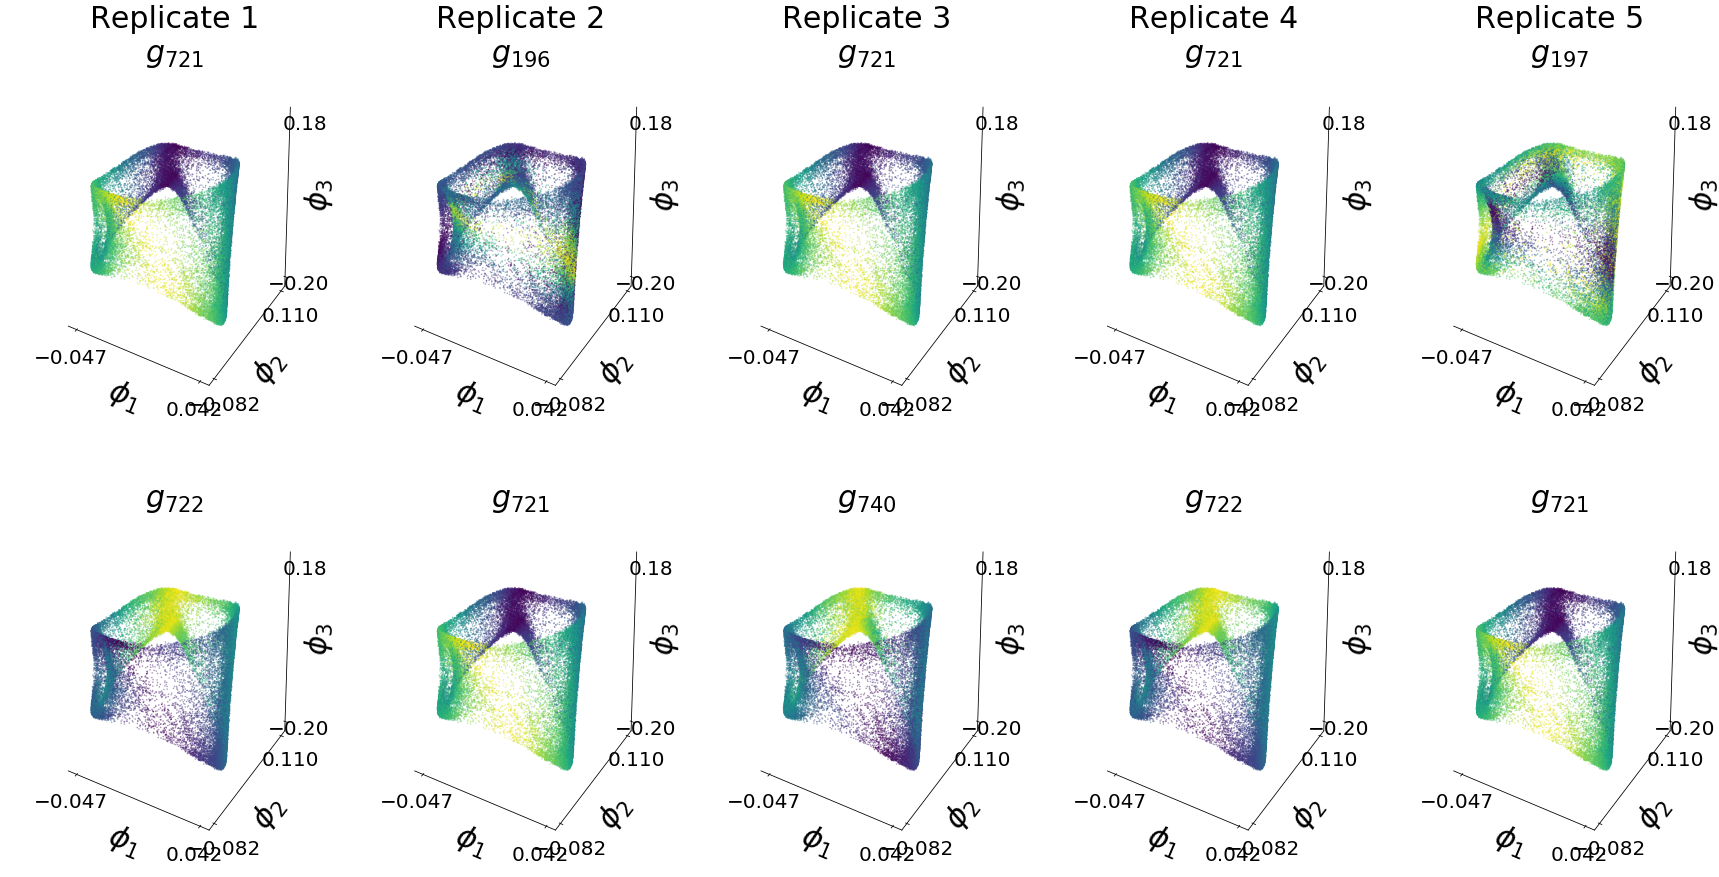

In [69]:
%matplotlib inline
data = experiment.N.data
axes = [0,1,2]
s = 100
alpha = .5

fig, axs = plt.subplots(2,5, figsize = (30,15))

for r in range(5):
    for o in range(2):
        axs[o,r].set_axis_off()
data = experiment.N.data
axes = [0,1,2]
s = 1
alpha = .5
selected_points = list(range(50000))
x = data[:, 0][selected_points]
y = data[:, 1][selected_points]
z = data[:, 2][selected_points]
for r in range(5):
    for o in range(2):
        ax = fig.add_subplot(2,5, o*5 + r + 1, projection='3d')
        #fig = plt.figure(figsize=(15,10))
        #ax = fig.add_subplot(1, 1, 1, projection='3d')
        ax.scatter(x, y, z, c = g_mf[r,o], s=s, alpha=alpha, marker='.',vmin=0,vmax=np.pi)
        ax.set_xlabel(r'$\phi_1$', fontsize = 30)
        ax.set_ylabel(r'$\phi_2$', fontsize = 30)
        ax.set_zlabel(r'$\phi_3$', fontsize = 30)
        
        if o ==0:
            ax.set_title('Replicate ' + str(r+1) + '\n' + r'$g_{{{}}}$'.format(sel[r][0]), fontsize = 30)
        if o == 1:
            ax.set_title(r'$g_{{{}}}$'.format(sel[r][1]), fontsize = 30)
        #ax.set_axis_off()
        xmin = np.float(np.format_float_positional(data[:, 0][selected_points].min(), precision=2, fractional=False))
        xmax = np.float(np.format_float_positional(data[:, 0][selected_points].max(), precision=2, fractional=False))
        ymin = np.float(np.format_float_positional(data[:, 1][selected_points].min(), precision=2, fractional=False))
        ymax = np.float(np.format_float_positional(data[:, 1][selected_points].max(), precision=2, fractional=False))
        zmin = np.float(np.format_float_positional(data[:, 2][selected_points].min(), precision=2, fractional=False))
        zmax = np.float(np.format_float_positional(data[:, 2][selected_points].max(), precision=2, fractional=False))
        ax.set_xticks([xmin, xmax])
        ax.set_yticks([ymin, ymax])
        ax.set_zticks([zmin, zmax])
        ax.tick_params(labelsize=20)

        ax.xaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
        ax.yaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
        ax.zaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
        # make the grid lines transparent
        ax.xaxis._axinfo["grid"]['color'] =  (1,1,1,0)
        ax.yaxis._axinfo["grid"]['color'] =  (1,1,1,0)
        ax.zaxis._axinfo["grid"]['color'] =  (1,1,1,0)    
#plt.savefig('/Users/samsonkoelle/Downloads/manigrad-100818/mani-samk-gradients/Figures/figure_for_jmlr/eth_full_sup_mflasso')

In [75]:
nreps = 5
saves = np.zeros((5,5))
for r in range(nreps):
    saves[r] = np.linalg.norm(np.einsum('n d m, n d p -> n p m ' ,replicates[r].df_M , replicates[r].dg_M), axis = tuple([0,2]))[subset_l0]

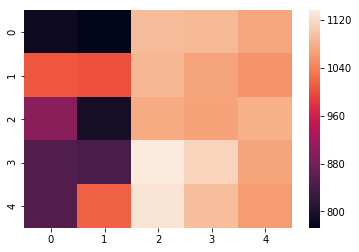

In [77]:
sns.heatmap(saves)

In [79]:
subset_l0

array([196, 197, 721, 722, 740])